## Chapter 4
# Convolution

Convolution is defined as

$h(n) = \sum_\limits{m=0}^\limits{n}{f(m)g(n-m)}$,

where $m$ and $n$ are integers.

In [1]:
import numpy as np

# f and g are numpy arrays
# This is pretty janky, but wanted to implement it myself.
# `np.convolve` for serious use.
def convolve(f, g):
    if len(f) < len(g):
        f, g = g, f
    g_reversed = g[::-1]
    convolved = np.zeros(len(f) + len(g) - 1)
    for n in range(convolved.size):
        if n < len(g):
            num_elements = n + 1
            product = g_reversed[-num_elements:] * f[:num_elements]
        elif n < f.size:
            num_elements = min(n, len(g))
            product = g_reversed[:num_elements] * f[n - num_elements + 1:n + 1]
        else:
            num_elements = len(convolved) - n
            product = g_reversed[:num_elements] * f[-num_elements:]
        convolved[n] = product.sum()
    return convolved

In [2]:
f = np.array([1, 2, 3, 4, 5])
g = np.array([1,2,3])
convolve(f, g) # matches example on p163

array([  1.,   4.,  10.,  16.,  22.,  22.,  15.])

In [3]:
assert (_ == np.convolve(f, g)).all()

In [4]:
f, g = g, f
convolve(f, g) # matches example on p164

array([  1.,   4.,  10.,  16.,  22.,  22.,  15.])

In [5]:
assert (_ == np.convolve(f, g)).all()

In [6]:
f = np.array([1, 2, 3, 4, 5])
g =  np.array([0,0.5,0,0,0])
convolve(f,g) # matches example on p165

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  0. ,  0. ,  0. ])

In [7]:
assert (_ == np.convolve(f, g)).all()

### Convolution Examples

The following animations emulate the ones on the [Wikipedia page for convolution](https://en.wikipedia.org/wiki/Convolution).

In [8]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from ipython_animation import create_animation, DEFAULT_FPS
%matplotlib inline

def plot_with_clipped_edges(x, y, **args):
    return plt.plot(np.concatenate([[x[0]], x, [x[-1]]]), np.concatenate([[0], y, [0]]), **args)

def create_convolution_animation(f, g, normalize=False, title='', length_seconds=3.5):
    x_max = len(f) * 5
    num_frames = x_max + len(g) + 1

    f = f / f.max()
    fig = plt.figure(figsize=(10.5, 2))
    plt.title(title)
    plt.axhline(color='black', linewidth=0.5)
    f_start = (x_max - len(f)) // 2
    f_line, = plot_with_clipped_edges(np.arange(len(f)) + f_start, f, c='b', label='$f(x)$')
    g_line, = plot_with_clipped_edges(np.arange(-len(g), 0), g, c='r', label='$g(x)$')
    convolution = convolve(f, g)
    if normalize:
        convolution = convolution / np.abs(convolution).max()
    revealed_convolution = np.full(len(convolution), np.nan)
    conv_line, = plt.plot(np.arange(len(convolution)) + (x_max - len(convolution)) / 2, revealed_convolution, label='$(f * g)(x)$', linewidth=3)
    plt.axis([0, x_max, min(0, convolution.min(), f.min(), g.min()), max(1, convolution.max(), f.max(), g.max()) + 0.1])
    plt.legend(loc='upper right')

    def animate(i):
        g_data = g_line.get_xdata() + 1
        g_line.set_xdata(g_data) # step convolution to the right
        g_pos = g_data[0]
        if g_pos + len(g) >= f_start and g_pos < f_start + len(f):
            n_revealed = g_pos + len(g) - f_start
            revealed_convolution[:n_revealed] = convolution[:n_revealed]
        conv_line.set_ydata(revealed_convolution)
    return create_animation(fig, plt, animate, length_seconds=length_seconds, frames_per_second=num_frames/length_seconds)

_**Convolving a function $f$ with an impulse function just copies $f$:**_

In [9]:
identity = np.zeros(19)
identity[9] = 1
create_convolution_animation(np.logspace(1, -1, 19), identity, title='Identity convolution')

_**Convolving $f$ with a shifted impulse function makes a shifted copy of $f$:**_

In [10]:
delayed = np.concatenate([np.zeros(18), [1]])
create_convolution_animation(np.logspace(1, -1, 19), delayed, title='Shifted convolution')

_**Convolving $f$ with a scaled, shifted impulse function scales and shiftes $f$:**_

In [11]:
delayed = np.concatenate([np.zeros(18), [0.5]])
create_convolution_animation(np.logspace(1, -1, 19), delayed, title='Shifted, scaled convolution')

**The following animations emulate _Figures 4.4-4.9_ on _p165-166_:**

In [12]:
create_convolution_animation(np.ones(10), np.array([1] * 10), normalize=True, title='Convolution of two rectangular windows')

In [13]:
create_convolution_animation(np.array([1] * 19), np.concatenate([np.linspace(0, 0.9, 10), np.linspace(1, 0, 10)]), normalize=True, title='Convolution of window with triangular function')

In [14]:
create_convolution_animation(np.logspace(1, -1, 20), np.ones(20), normalize=True, title='Convolution of exponential decay with rectangular window')

In [15]:
create_convolution_animation(np.sin(np.linspace(0, 2 * np.pi, 20)), np.sin(np.linspace(0, 2 * np.pi, 20)), normalize=True, title='Convolution of two sine waves')

In [16]:
square_wave = np.concatenate([np.ones(10), np.full(10, -1)])
create_convolution_animation(square_wave, square_wave, 'Convolution of two square waves')

In [17]:
create_convolution_animation(np.logspace(1, -1, 20), np.tile([1,0,], 10), 'Convolution of impulse train with exponential decay')

**... and here are a few others for fun**

In [18]:
create_convolution_animation(np.logspace(1, -1, 20), np.logspace(-1, 0, 20), normalize=True)

In [19]:
create_convolution_animation(np.tile([1,0,0,1], 5), np.tile([1,0], 10), normalize=True)

In [20]:
create_convolution_animation(np.linspace(0, 1, 20), np.linspace(1, 0, 20), normalize=True)

In [21]:
create_convolution_animation(np.ones(20), np.ones(5), normalize=True)

In [22]:
create_convolution_animation(np.sin(np.linspace(0, 2 * np.pi, 40)), np.sin(np.linspace(0, 2 * np.pi * 5, 40)), normalize=True)

In [23]:
create_convolution_animation(np.linspace(0, 1, 20), np.array([1, 0, 0.5, 0, 0.25, 0, 0.125, 0, 0.0625, 0]), normalize=True)

In [24]:
create_convolution_animation(np.sinc(np.linspace(-2 * np.pi, 2 * np.pi, 42)[1:-1]), np.array([0, -1] + [0] * 16 + [1, 0]), normalize=True)

## Convolving Spectra

### Multiplying Signals Convolves Their Spectra

In [25]:
def rotate_fft(X):
    return np.abs(np.roll(X, len(X) // 2 + 1))

In [26]:
def unrotate_fft(X):
    return np.abs(np.roll(X, -(len(X) // 2 + 1)))

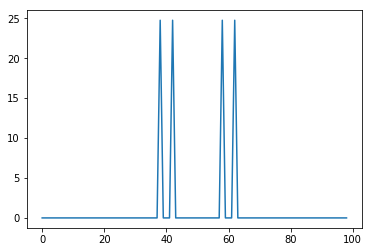

In [27]:
x = np.sin(np.linspace(0, 4 * np.pi, 100)[:-1])
y = np.sin(np.linspace(0, 20 * np.pi, 100)[:-1])

xy = x * y
convolution_length = len(x) + len(y) - 1
_ = plt.plot(rotate_fft(np.fft.fft(xy)))

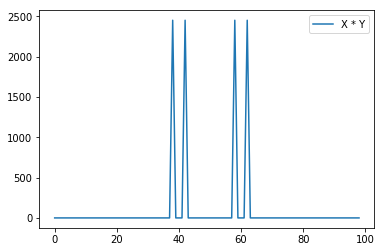

In [28]:
convolved_spectrum = convolve(rotate_fft(np.fft.fft(x)), rotate_fft(np.fft.fft(y)))
offset = len(x) // 2 + 1 # only the middle values are valid
convolved_spectrum = convolved_spectrum[offset:offset + len(x)]
plt.plot(convolved_spectrum, label='X * Y')
_ = plt.legend()

### Convolving Spectra Multiplies Their Signals

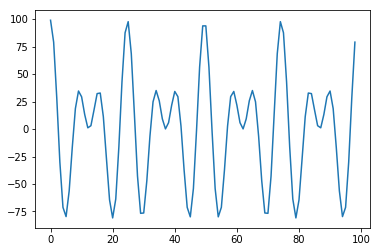

In [29]:
_ = plt.plot(np.fft.ifft(unrotate_fft(convolved_spectrum)).real)

Only off by a phase shift.

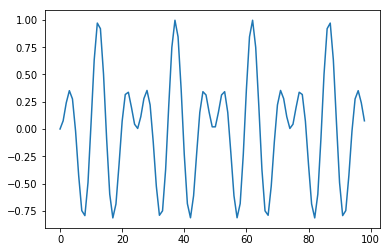

In [30]:
_ = plt.plot(x * y)

## Convolving Signals

### Multiplying Spectra Convolves Their Signals

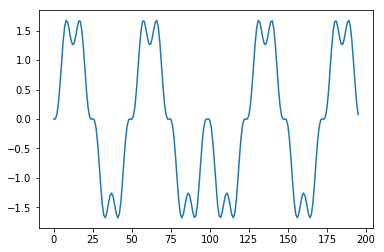

In [31]:
x_spectrum = np.fft.rfft(x, n=convolution_length)
y_spectrum = np.fft.rfft(y, n=convolution_length)

_ = plt.plot(np.fft.irfft(x_spectrum * y_spectrum))

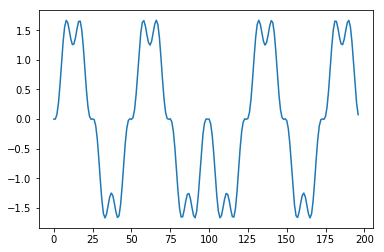

In [32]:
convolved_xy = convolve(x, y)
_ = plt.plot(convolved_xy)

### Convolving Signals Multiplies Thier Spectra

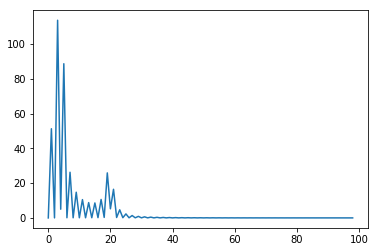

In [33]:
_ = plt.plot(np.abs(np.fft.rfft(convolved_xy)))

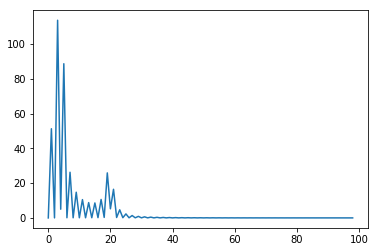

In [34]:
_ = plt.plot(np.abs(x_spectrum * y_spectrum))

### Generating Fractal Noise by Multiplying Spectra

In [35]:
# Adapted from p174-175
def shaped_noise(spectral_tendency, N, lower_bound=-1, upper_bound=1):
    x = np.random.rand(N) * 2 - 1
    X = np.fft.fft(x)
    power = np.abs(X) ** 2
    power /= np.arange(len(X)) ** spectral_tendency + 1e-12
    amplitude = power ** 0.5
    phase = np.angle(X)
    X = amplitude * (np.cos(phase) + 1j * np.sin(phase)) # reconstruct the spectrum
    # Force the spectrum to be conjugate-symmetric around 0 Hz
    X[-1:-(N//2 + 1):-1] = np.conj(X[1:N//2 + 1])
    cr = np.fft.ifft(X).real
    return (upper_bound - lower_bound) * (cr - cr.min()) / (cr.max() - cr.min()) + lower_bound

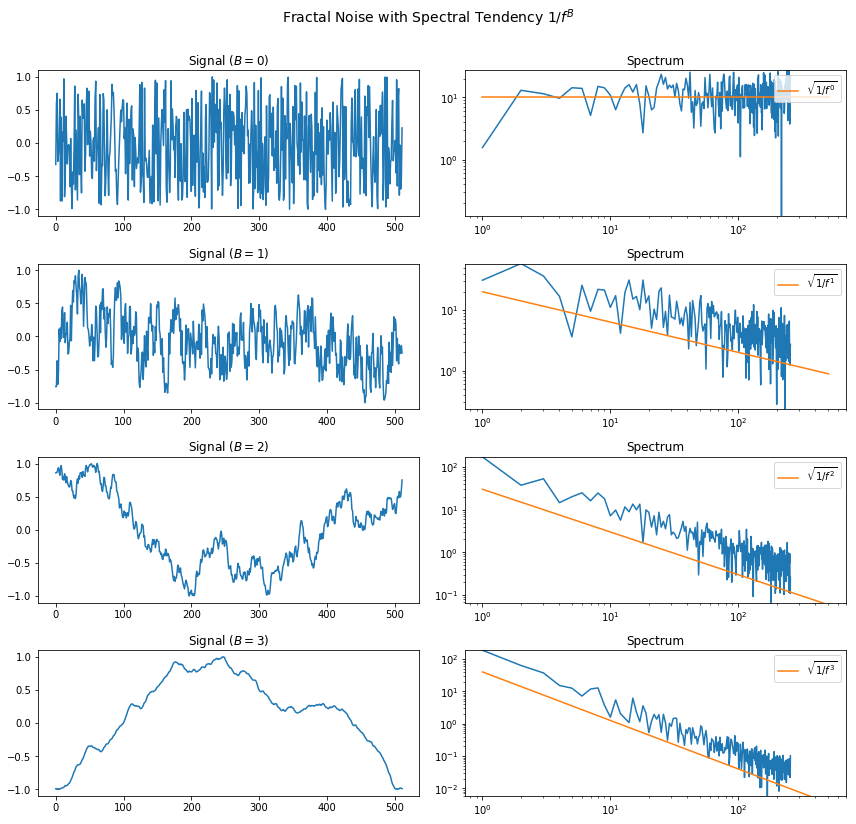

In [36]:
fig = plt.figure(figsize=(12, 16))
fig.suptitle('Fractal Noise with Spectral Tendency $1/f^B$', size=14, y=1.03)
for b in range(4):
    x = shaped_noise(b, 512)
    plt.subplot(6, 2, b * 2 + 1)
    plt.title('Signal ($B = %i$)' % b)
    plt.plot(x)
    plt.subplot(6, 2, b * 2 + 2)
    spectrum = np.abs(np.fft.rfft(x))
    plt.title('Spectrum')
    plt.loglog(spectrum)
    # spectral tendency refers to power. we're plotting amplitude, so take sqrt
    spectral_tendancy = (1 / (((np.arange(len(x))) ** b) + 1e-12)) ** 0.5
    # scaling of spectral tendancy here is hand-chosen to make it close to plotted values
    # (not mathematically motivated)
    plt.loglog(spectral_tendancy * 10 * (b + 1), label='$\\sqrt{1/f^%i}$' % b)
    plt.ylim(spectrum.min(), spectrum.max())
    plt.legend(loc='upper right')
plt.tight_layout()

Let's listen to the results at a different sample rates and verify they sound roughly the same:

In [37]:
from NoteSequence import render_samples_ipython
from conversion import SAMPLES_PER_SECOND
from AR import AR

fractal_noise_samples = shaped_noise(1, SAMPLES_PER_SECOND * 3)
AR().apply(fractal_noise_samples) # smooth start and end envelope
render_samples_ipython(fractal_noise_samples, rate=SAMPLES_PER_SECOND)

In [38]:
render_samples_ipython(fractal_noise_samples[:len(fractal_noise_samples) // 2], rate=SAMPLES_PER_SECOND / 2)

## Domain Symmetry Between Signals and Spectra

### Cosine Symmetry

The Fourier transform of the Fourier transform of a signal is the identical signal.

This is just bonkers to me. Note that this isn't the _IDFT_ of the FFT, but the _FFT_ of the FFT.  It's telling us that the frequency energies of a signal with two delayed impulses at the indexes of the original signal's positive and negative frequencies are themselves sinusoidal in magnitude with the exact same phase and frequency as the original signal.

Another way of putting this: Two impulses symmetrically placed transform into a cosine wave.

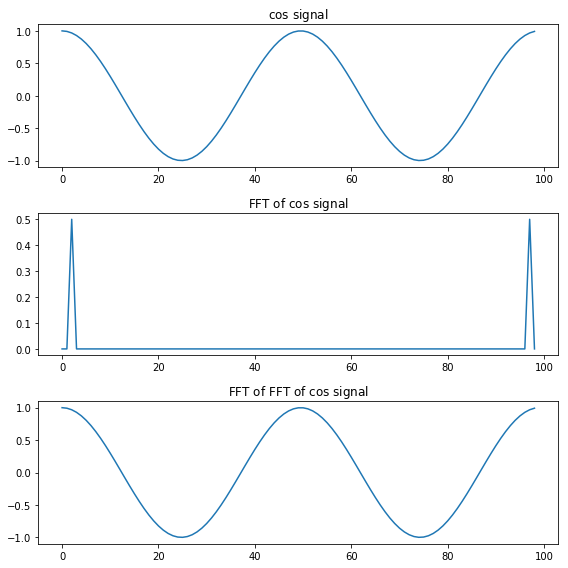

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.title('$\cos$ signal')
x = np.cos(np.linspace(0, 4 * np.pi, 100))[:-1]
plt.plot(x)
plt.subplot(312)
plt.title('FFT of $\cos$ signal')
spectrum = np.fft.fft(x).real / len(x)
plt.plot(spectrum)
plt.subplot(313)
plt.title('FFT of FFT of $\cos$ signal')
plt.plot(np.fft.fft(spectrum).real)
_ = plt.tight_layout()

The same can be done with a sine wave if we use the imaginary components (since the FFT of a sine wave is purely imaginary). It works in general if we take the FFT of the complex FFT and we reverse the final signal:

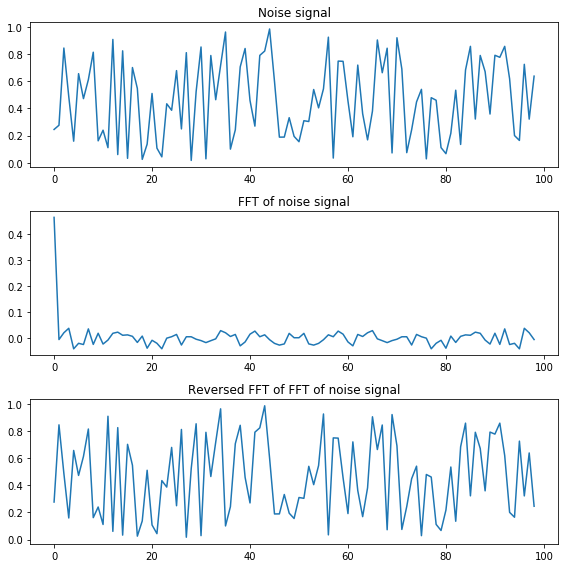

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(311)
plt.title('Noise signal')
x = np.random.rand(100)[:-1]
plt.plot(x)
plt.subplot(312)
plt.title('FFT of noise signal')
spectrum = np.fft.fft(x) / len(x)
plt.plot(spectrum.real)
plt.subplot(313)
plt.title('Reversed FFT of FFT of noise signal')
plt.plot(np.fft.fft(spectrum).real[::-1])
_ = plt.tight_layout()

### Wavelength Symmetry

Because period and frequency are inverses of each other, shorter distances in the time domain correspond to longer distances in the frequency domain.

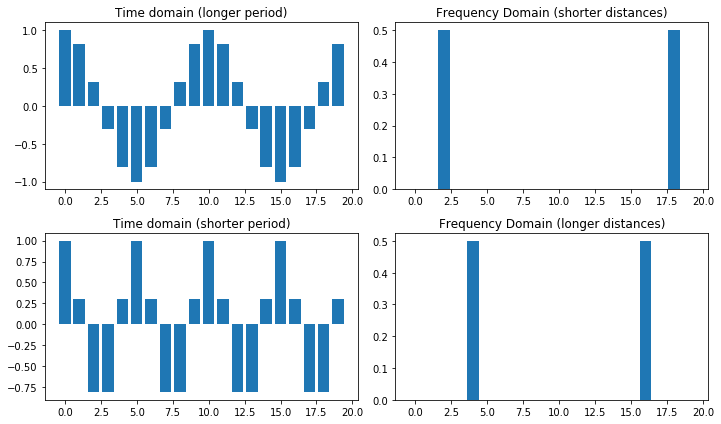

In [41]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Time domain (longer period)')
x_range = np.arange(20)
x = np.cos(np.linspace(0, 4 * np.pi, 21))[:-1]
plt.bar(x_range, x)
plt.subplot(222)
plt.title('Frequency Domain (shorter distances)')
spectrum = np.fft.fft(x) / len(x)
plt.bar(x_range, spectrum.real)
plt.subplot(223)
plt.title('Time domain (shorter period)')
x = np.cos(np.linspace(0, 8 * np.pi, 21))[:-1]
plt.bar(x_range, x)
plt.subplot(224)
plt.title('Frequency Domain (longer distances)')
spectrum = np.fft.fft(x) / len(x)
plt.bar(x_range, spectrum.real)
_ = plt.tight_layout()

### Impulse and Constant Function Symmetry

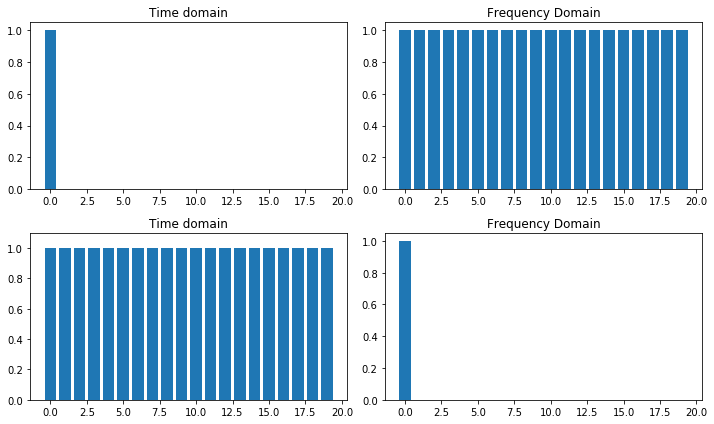

In [42]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('Time domain')
x = np.concatenate([[1], np.zeros(19)])
plt.bar(x_range, x)
plt.subplot(222)
plt.title('Frequency Domain')
spectrum = np.fft.fft(x)
plt.bar(x_range, spectrum.real)
plt.subplot(223)
plt.title('Time domain')
x = spectrum.real
plt.bar(x_range, x)
plt.ylim(0, 1.1)
plt.subplot(224)
plt.title('Frequency Domain')
spectrum = np.fft.fft(x) / len(x)
plt.bar(x_range, spectrum.real)
_ = plt.tight_layout()